In [1]:
#read the data
import pandas as pd
df=pd.read_csv("/content/cancer.csv",encoding='latin1')
df.head()

,Unnamed: 0,0,a
0,0,Thyroid_Cancer,Thyroid surgery in children in a single insti...
1,1,Thyroid_Cancer,""" The adopted strategy was the same as that us..."
2,2,Thyroid_Cancer,coronary arterybypass grafting thrombosis ï¬b...
3,3,Thyroid_Cancer,Solitary plasmacytoma SP of the skull is an u...
4,4,Thyroid_Cancer,This study aimed to investigate serum matrix ...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7570 entries, 0 to 7569
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7570 non-null   int64 
 1   0           7570 non-null   object
 2   a           7570 non-null   object
dtypes: int64(1), object(2)
memory usage: 177.6+ KB


In [3]:
#rename cols
df = df.rename(columns={'0': 'labels', 'a': 'text'})

In [4]:
# df['labels'].unique()
df['labels'].value_counts()

,count
labels,
Thyroid_Cancer,2810
Colon_Cancer,2580
Lung_Cancer,2180


In [5]:
texts = df['text'].values
labels = df['labels'].values

In [6]:
#split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42,shuffle=True,stratify=labels)

print("Dimensions of X_train :", X_train.shape)
print("Dimensions of X_test  :", X_test.shape)
print("Dimensions of y_train :", y_train.shape)
print("Dimensions of y_test  :", y_test.shape)

Dimensions of X_train : (6056,)
Dimensions of X_test  : (1514,)
Dimensions of y_train : (6056,)
Dimensions of y_test  : (1514,)


In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_seq[0]

[1408,
 317,
 5,
 31211,
 8217,
 49,
 6,
 898,
 205,
 7,
 1,
 172,
 12545,
 6073,
 15,
 1991,
 3,
 11,
 1,
 16893,
 109,
 292,
 15,
 4,
 791,
 3,
 1,
 6446,
 10689,
 15,
 4,
 320,
 1560,
 664,
 6073,
 15,
 59330,
 21,
 4736,
 110,
 191448,
 2666,
 221,
 1245,
 103,
 19,
 93,
 64,
 25,
 1458,
 1,
 2336,
 1595,
 24737,
 2024,
 3,
 55,
 26,
 81,
 7,
 623,
 494,
 1346,
 66421,
 25,
 2,
 26502,
 33563,
 3,
 3,
 1546,
 133,
 188,
 59331,
 252,
 1,
 156,
 1,
 2666,
 1595,
 11,
 437,
 2024,
 3,
 11,
 191449,
 12,
 588,
 64,
 25,
 2,
 7738,
 7222,
 191450,
 1716,
 3,
 10747,
 2072,
 62,
 2884,
 5851,
 30,
 34,
 353,
 115,
 191451,
 6073,
 16,
 2945,
 2001,
 6,
 2336,
 1595,
 2,
 1991,
 1537,
 37046,
 7,
 623,
 494,
 30,
 2821,
 13,
 1,
 221,
 1595,
 519,
 2945,
 16,
 135,
 26,
 1202,
 12,
 1921,
 1,
 25,
 2,
 1716,
 855,
 1184,
 7766,
 2,
 1,
 16,
 37889,
 3,
 2945,
 16,
 10,
 184,
 7,
 191452,
 37047,
 4121,
 874,
 21556,
 1039,
 28,
 293,
 453,
 874,
 18,
 6,
 362,
 30397,
 3,
 1039,
 8,
 223

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max([len(seq) for seq in X_train_seq])  # Maximum length of sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

X_train_pad[0]

array([    0,     0,     0, ...,     9, 70151,   165], dtype=int32)

In [13]:
print(max_len)

5616


In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_ = label_encoder.fit_transform(y_train)
y_test_ = label_encoder.transform(y_test)



y_train_cat = to_categorical(y_train_, num_classes=3)
y_test_cat = to_categorical(y_test_, num_classes=3)

y_train_cat

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
history = model.fit(X_train_pad, y_train_cat, epochs=5, batch_size=32, validation_split=0.2)
history

Epoch 1/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 949s 6s/step - accuracy: 0.5167 - loss: 1.0165 - val_accuracy: 0.8333 - val_loss: 0.7797
Epoch 2/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 966s 6s/step - accuracy: 0.8423 - loss: 0.7581 - val_accuracy: 0.8655 - val_loss: 0.4112
Epoch 3/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 976s 6s/step - accuracy: 0.9075 - loss: 0.2865 - val_accuracy: 0.9274 - val_loss: 0.1913
Epoch 4/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 986s 6s/step - accuracy: 0.9510 - loss: 0.1390 - val_accuracy: 0.9472 - val_loss: 0.1260
Epoch 5/5
152/152 ━━━━━━━━━━━━━━━━━━━━ 990s 6s/step - accuracy: 0.9627 - loss: 0.0985 - val_accuracy: 0.9521 - val_loss: 0.1005


In [14]:
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)

print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

48/48 ━━━━━━━━━━━━━━━━━━━━ 27s 550ms/step - accuracy: 0.9618 - loss: 0.0904
Test loss: 0.08378643542528152
Test accuracy: 0.9663143754005432


In [16]:
import numpy as np
predictions = model.predict(X_test_pad)
predicted_labels = np.argmax(predictions, axis=1)
predicted_labels

48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 583ms/step


array([1, 1, 2, ..., 1, 2, 2])

In [17]:
res_df = pd.DataFrame({
    'Actual Labels': y_test_,
    'Predicted Labels': predicted_labels
})

res_df[:30]

,Actual Labels,Predicted Labels
0,1,1
1,1,1
2,2,2
3,0,0
4,1,1
5,2,2
6,2,2
7,0,0
8,2,2
9,1,1


In [18]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test_, predicted_labels, target_names=label_encoder.classes_))

                precision    recall  f1-score   support

  Colon_Cancer       0.97      0.93      0.95       516
   Lung_Cancer       1.00      1.00      1.00       436
Thyroid_Cancer       0.94      0.98      0.96       562

      accuracy                           0.97      1514
     macro avg       0.97      0.97      0.97      1514
  weighted avg       0.97      0.97      0.97      1514



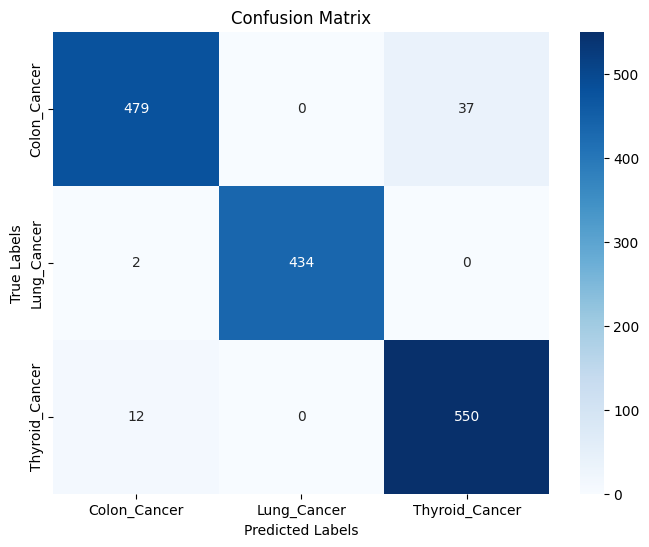

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(y_test_, predicted_labels)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [20]:
model.save("text_rnn_model.h5")
from tensorflow.keras.models import load_model

model = load_model("text_rnn_model.h5")


In [21]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(label_encoder, f)


In [22]:
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)
